In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('dataCovid.csv')
df.head(10000000)

,SEX,PNEUMONIA,AGE,DIABETES,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,RESULT
0,2,2,55,1,2,2,2,2,2,2,2,2,1
1,1,1,40,2,2,2,2,2,2,2,2,2,0
2,1,2,37,1,2,1,2,2,1,2,2,2,0
3,1,2,25,2,2,2,2,2,2,2,2,2,0
4,2,2,24,2,2,2,2,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108313,2,2,54,1,2,2,2,2,2,2,2,2,0
108314,2,2,62,2,2,2,2,2,2,2,2,2,0
108315,1,2,47,1,2,2,2,2,2,2,2,2,0
108316,2,2,72,1,2,2,2,1,1,2,2,2,0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
def calc_Fmeasure(prediction, labels):

  true_positive = np.sum((prediction + labels) == 2)
  false_positive = np.sum((labels - prediction) == -1)
  false_negative = np.sum((prediction - labels) == -1)
  positive = np.count_nonzero(labels == 1)
  negative = len(labels)-positive

  accuracy = 100*np.sum(prediction == labels)/len(labels)
  recall = true_positive / (true_positive + false_negative)
  precision = true_positive / (true_positive + false_positive)
  eval = 2*(precision * recall) / (precision + recall)
  return eval


train, test = train_test_split(df, test_size=0.3, shuffle=True)


test_y = test.RESULT.to_numpy()
test_x = test.drop(columns = ['RESULT']).to_numpy()
train_y_full = train.RESULT.to_numpy()
train_x_full = train.drop(columns = ['RESULT']).to_numpy()


In [28]:
from sklearn.tree import DecisionTreeClassifier

heuristics = ["entropy", "gini"]
splitters = ["best", "random"]
max_depth = [5, 7, 11, 13, 17]
dt_fmeasures = {}
dt_best_result = 0
y_preds = []
for d in max_depth:
        
    dt_fmeasures[d] = np.zeros(len(heuristics)*len(splitters))
    i=0
    for heuristic, splitter in [(heuristic, splitter) for heuristic in heuristics for splitter in splitters]:
        print("Max Depth:", d)
        print("Heuristic:", heuristic)
        print("Splitter:", splitter)
    
        dt_classifier = DecisionTreeClassifier(criterion=heuristic, splitter=splitter, max_depth=d, class_weight='balanced')
        dt_classifier.fit(train_x_full, train_y_full)
        y_pred = dt_classifier.predict(train_x_full)
        y_preds.append(y_pred)
        
        dt_fmeasures[d][i] = calc_Fmeasure(y_pred, train_y_full)
        if dt_fmeasures[d][i] > dt_best_result:
            dt_best_result = dt_fmeasures[d][i]
            dt_best_model = dt_classifier
        print("F-Measure:", dt_fmeasures[d][i])
        i=i+1

Max Depth: 5
Heuristic: entropy
Splitter: best
F-Measure: 0.6352635263526353
Max Depth: 5
Heuristic: entropy
Splitter: random
F-Measure: 0.6271366124980032
Max Depth: 5
Heuristic: gini
Splitter: best
F-Measure: 0.633572115591668
Max Depth: 5
Heuristic: gini
Splitter: random
F-Measure: 0.6081587205182711
Max Depth: 7
Heuristic: entropy
Splitter: best
F-Measure: 0.6488418918733821
Max Depth: 7
Heuristic: entropy
Splitter: random
F-Measure: 0.6459823679297988
Max Depth: 7
Heuristic: gini
Splitter: best
F-Measure: 0.6443644280690002
Max Depth: 7
Heuristic: gini
Splitter: random
F-Measure: 0.6261833362732993
Max Depth: 11
Heuristic: entropy
Splitter: best
F-Measure: 0.6652544099075244
Max Depth: 11
Heuristic: entropy
Splitter: random
F-Measure: 0.6570461673911848
Max Depth: 11
Heuristic: gini
Splitter: best
F-Measure: 0.665622190131059
Max Depth: 11
Heuristic: gini
Splitter: random
F-Measure: 0.6571278332825948
Max Depth: 13
Heuristic: entropy
Splitter: best
F-Measure: 0.6749564175201568
Ma

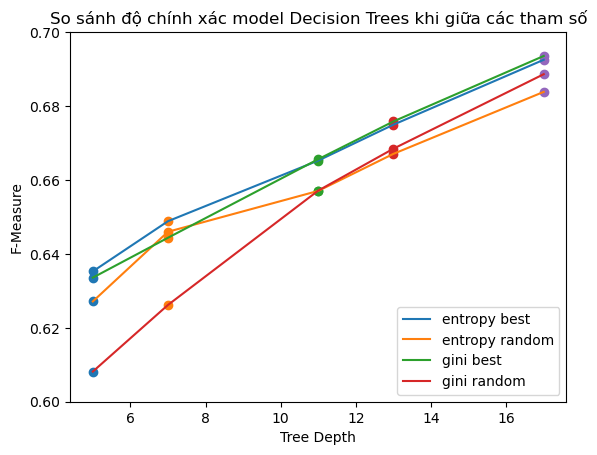

In [32]:
import matplotlib.pyplot as plt
l1, l2, l3, l4 = [], [], [], []
for k in dt_fmeasures.keys():
    fmeasures = dt_fmeasures[k]
    plt.scatter([k] * len(fmeasures), fmeasures)
    l1.append(dt_fmeasures[k][0])
    l2.append(dt_fmeasures[k][1])
    l3.append(dt_fmeasures[k][2])
    l4.append(dt_fmeasures[k][3])

plt.errorbar(max_depth, l1, label ='entropy best')
plt.errorbar(max_depth, l2, label ='entropy random')
plt.errorbar(max_depth, l3, label ='gini best')
plt.errorbar(max_depth, l4, label ='gini random')
plt.legend(loc ='lower right')
plt.title('So sánh độ chính xác model Decision Trees khi giữa các tham số')
plt.xlabel('Tree Depth')
plt.ylabel('F-Measure')
plt.ylim(0.60 , 0.7)
plt.show()

In [33]:
params = dt_best_model.get_params()
print('Tham số tốt nhất: heuristic = %s, splitter = %s, max depth = %d, F-measure = %f' 
      % (params['criterion'], params['splitter'], params['max_depth'], dt_best_result))

Tham số tốt nhất: heuristic = gini, splitter = best, max depth = 17, F-measure = 0.693547


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# Lấy lại toàn bộ tập huấn luyện


y_preds_train = dt_best_model.predict(train_x_full)

# Tính toán các chỉ số đánh giá
cm = confusion_matrix(train_y_full, y_preds_train)
accuracy = accuracy_score(train_y_full, y_preds_train)
precision = precision_score(train_y_full, y_preds_train)
recall = recall_score(train_y_full, y_preds_train)
f1 = 2 * (precision * recall) / (precision + recall)

print("Confusion Matrix:")
print(cm)
print("Accuracy:",  accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[28953 13769]
 [ 8219 24881]]
Accuracy: 0.710005011738018
Precision: 0.643751617076326
Recall: 0.7516918429003021
F1 Score: 0.6935470383275262


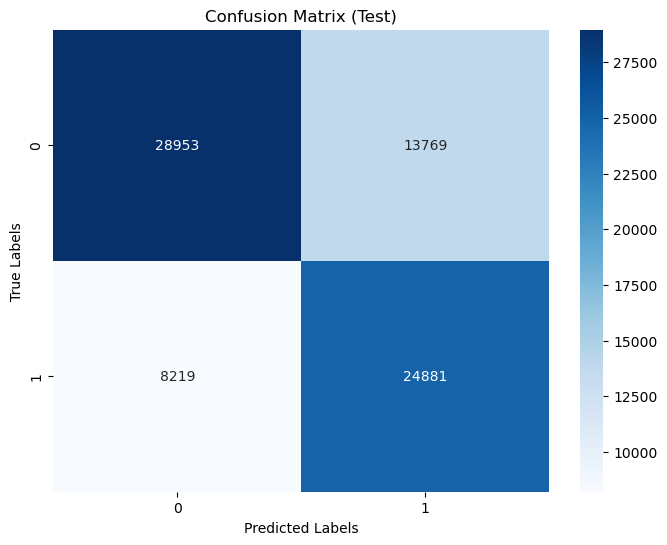

In [43]:
# Tạo biểu đồ
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Test)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [44]:
# Dự đoán kết quả trên tập kiểm tra
y_preds_test = dt_best_model.predict(test_x)

# Tính toán các chỉ số đánh giá trên tập kiểm tra
cm_test = confusion_matrix(test_y, y_preds_test)
accuracy_test = accuracy_score(test_y, y_preds_test)
precision_test = precision_score(test_y, y_preds_test)
recall_test = recall_score(test_y, y_preds_test)
f1_test = f1_score(test_y, y_preds_test)

print("Confusion Matrix (Test):")
print(cm_test)
print("Accuracy (Test):", accuracy_test)
print("Precision (Test):", precision_test)
print("Recall (Test):", recall_test)
print("F1 Score (Test):", f1_test)


Confusion Matrix (Test):
[[11408  6961]
 [ 4790  9337]]
Accuracy (Test): 0.6383862629246676
Precision (Test): 0.5728923794330593
Recall (Test): 0.6609329652438592
F1 Score (Test): 0.613771569433032


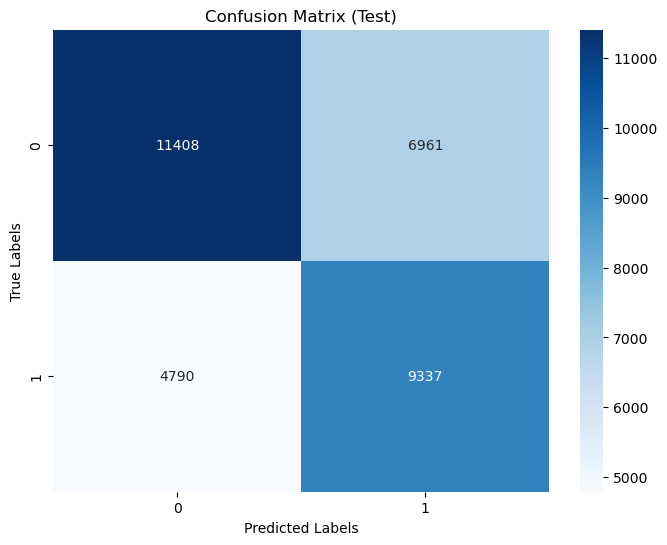

In [45]:
# Tạo biểu đồ
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Test)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [36]:
đf.y_preds[0]

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [ ]:
df.head(19999994)